# Apple Stock Data Analysis and Visualization (2010-2020)

## Introduction

In this notebook, we explore Apple Inc.'s historical stock data spanning from 2010 to 2020. The goal is to analyze and visualize the time series data to uncover trends, seasonal patterns, and other insights about the stock's performance over the decade.

## Dataset Description

The dataset includes the following columns:

- **Close/Last**: The closing price of the stock on a particular day.
- **Volume**: The number of shares traded on that day.
- **Open**: The opening price of the stock for the day.
- **High**: The highest price of the stock during the day.
- **Low**: The lowest price of the stock during the day.


## Need for Visualization

Visualization is essential for time series analysis to:

1. **Identify Trends**: Understand the overall direction of the stock price.
2. **Detect Seasonality**: Find recurring patterns or cycles.
3. **Analyze Volatility**: Assess the variability and stability of stock prices.
4. **Understand Distribution**: Examine the spread and frequency of stock prices.

## Libraries and Functions for Time Series Analysis

### `seasonal_decompose` from `statsmodels.tsa.seasonal`

- **Purpose**: Time Series Decomposition
- **Description**: The `seasonal_decompose` function is used to decompose a time series into its constituent components: seasonal, trend, and residual. This decomposition helps in understanding the underlying patterns in the data, such as recurring seasonal effects, overall trends, and random noise. By separating these components, analysts can gain insights into the periodic behavior of the data and identify any long-term trends or irregular patterns.

### `ARIMA` from `statsmodels.tsa.arima.model`

- **Purpose**: Time Series Forecasting
- **Description**: The `ARIMA` (AutoRegressive Integrated Moving Average) model is used for forecasting time series data. It combines three components: autoregressive (AR) terms, differencing (I) to make the data stationary, and moving average (MA) terms. ARIMA is suitable for modeling and predicting future values based on past observations, making it a powerful tool for understanding and forecasting time-dependent data.

### `mean_squared_error` from `sklearn.metrics`

- **Purpose**: Model Evaluation
- **Description**: The `mean_squared_error` function measures the performance of regression models by calculating the average of the squared differences between observed actual outcomes and predicted values. This metric provides an indication of how well a model's predictions align with the actual data. A lower mean squared error signifies better model performance, making it a critical tool for evaluating the accuracy and effectiveness of time series forecasting models.



In [28]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [2]:
file_path = "C:\\Users\\HP\\Downloads\\archive (11)\\HistoricalQuotes.csv"
df = pd.read_csv(file_path , parse_dates=["Date"], index_col = "Date")
df.head(5)

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-02-28,$273.36,106721200,$257.26,$278.41,$256.37
2020-02-27,$273.52,80151380,$281.1,$286,$272.96
2020-02-26,$292.65,49678430,$286.53,$297.88,$286.5
2020-02-25,$288.08,57668360,$300.95,$302.53,$286.13
2020-02-24,$298.18,55548830,$297.26,$304.18,$289.23


In [3]:
# Strip leading and trailing spaces from the column names
df.columns = df.columns.str.strip()

In [4]:
# Display the cleaned column names to confirm
print("Cleaned column names in the DataFrame:")
print(df.columns)

Cleaned column names in the DataFrame:
Index(['Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')


In [5]:
df['Close/Last'] = df['Close/Last'].str.split().str[0].replace('[\$,]', '', regex=True).astype(float)


In [6]:
df['Open'] = df['Open'].str.split().str[0].replace('[\$,]', '', regex=True).astype(float)

In [7]:
df['High'] = df['High'].str.split().str[0].replace('[\$,]', '', regex=True).astype(float)

In [8]:
df['Low'] = df['Low'].str.split().str[0].replace('[\$,]', '', regex=True).astype(float)

In [20]:
# Clean columns by ensuring they are numeric where applicable
numeric_columns = ['Close/Last', 'Volume', 'Open', 'High', 'Low']
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Set frequency to monthly using 'ME' (Month-End)
#df = df.asfreq('ME')  # Set frequency to month-end

# Check for and handle missing values for all columns
if df.isnull().any().any():
    df.fillna(method='ffill', inplace=True)  # Forward fill missing values

C:\Users\HP\AppData\Local\Temp\ipykernel_20916\2433714236.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


In [9]:
print(df.columns)


Index(['Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')


In [10]:
# Filter the data for the year 2020
data_2020 = df.loc['2020']

# Display the filtered data
print(data_2020)

            Close/Last     Volume     Open      High       Low
Date                                                          
2020-02-28      273.36  106721200  257.260  278.4100  256.3700
2020-02-27      273.52   80151380  281.100  286.0000  272.9600
2020-02-26      292.65   49678430  286.530  297.8800  286.5000
2020-02-25      288.08   57668360  300.950  302.5300  286.1300
2020-02-24      298.18   55548830  297.260  304.1800  289.2300
2020-02-21      313.05   32426420  318.620  320.4500  310.5000
2020-02-20      320.30   25141490  322.630  324.6500  318.2100
2020-02-19      323.62   23495990  320.000  324.5700  320.0000
2020-02-18      319.00   38190550  315.360  319.7500  314.6100
2020-02-14      324.95   20028450  324.740  325.9800  322.8500
2020-02-13      324.87   23686890  324.190  326.2200  323.3500
2020-02-12      327.20   28432570  321.470  327.2200  321.4700
2020-02-11      319.61   23580780  323.600  323.9000  318.7100
2020-02-10      321.55   27337220  314.180  321.5500  3

## find an avg price of apple stock in january

In [11]:
df.loc["2020-01"]["Close/Last"].mean()

311.91619047619054

In [12]:
df = df.sort_index()
df.loc["2020-01-07":"2020-01-31"]
df.loc["2020-01-07":"2020-01-31"]

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-01-07,298.39,27877660,299.840,300.9000,297.4800
2020-01-08,303.19,33090950,297.160,304.4399,297.1560
2020-01-09,309.63,42621540,307.235,310.4300,306.2000
2020-01-10,310.33,35217270,310.600,312.6700,308.2500
2020-01-13,316.96,30521720,311.640,317.0700,311.1500
2020-01-14,312.68,40653460,316.700,317.5700,312.1700
2020-01-15,311.34,30480880,311.850,315.5000,309.5500
2020-01-16,315.24,27207250,313.590,315.7000,312.0900
2020-01-17,318.73,34454120,316.270,318.7400,315.0000


## Resampling
### avg close price of every month of every year

In [13]:
df['Close/Last'].resample('M').mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_20916\3164244559.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Close/Last'].resample('M').mean()


Date
2010-03-31     31.915791
2010-04-30     35.878352
2010-05-31     35.923015
2010-06-30     37.306545
2010-07-31     36.421338
                 ...    
2019-10-31    235.286522
2019-11-30    262.520500
2019-12-31    276.525714
2020-01-31    311.916190
2020-02-29    311.270526
Freq: ME, Name: Close/Last, Length: 120, dtype: float64

<Axes: xlabel='Date'>

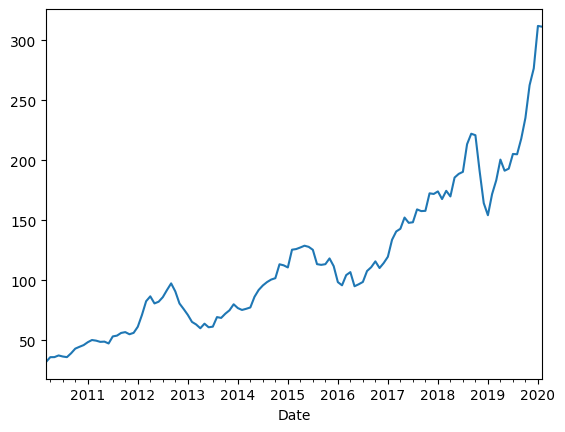

In [14]:
df['Close/Last'].resample('ME').mean().plot()

# Applying Rolling Windows Correctly

In [15]:

# Calculate Rolling Mean: Compute a 7-year rolling mean on the yearly averages.
df_yearly = df['Close/Last'].resample('YE').mean()
df_yearly['rolling_mean'] = df_yearly.rolling(window=7).mean()

## Decomposing Time Series for Insights
### Overview: Decomposition breaks down a time series into its components (trend, seasonality, and residuals) to better understand its structure and make informed decisions.

## Types:

### Additive Model: Suitable when seasonal effects are constant over time.
### Multiplicative Model: Suitable when seasonal effects vary proportionally with the trend.
### Example: Decompose monthly sales data to identify long-term trends, seasonal patterns, and residual variations.

C:\Users\HP\AppData\Local\Temp\ipykernel_20916\3103444791.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust plot to fit everything neatly


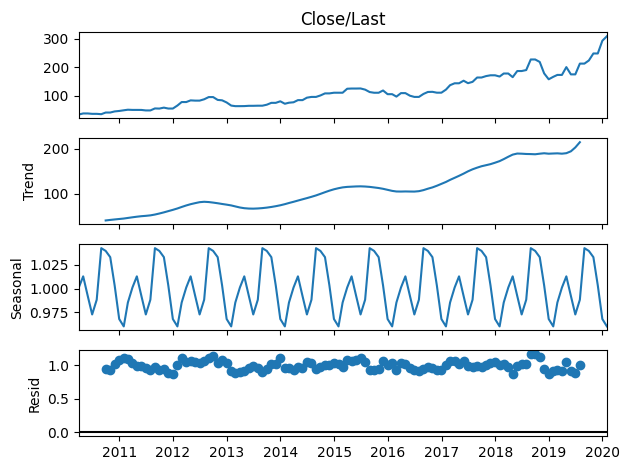

In [21]:
# Set frequency to monthly using 'ME' (Month-End)
df = df.asfreq('ME')  # Set frequency to month-end


# Perform seasonal decomposition with a period of 12 for monthly data
decomposition = seasonal_decompose(df['Close/Last'], model='multiplicative', period=12)

# Plot the decomposition
fig = decomposition.plot()
plt.tight_layout()  # Adjust plot to fit everything neatly
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20916\3952758815.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust plot to fit everything neatly


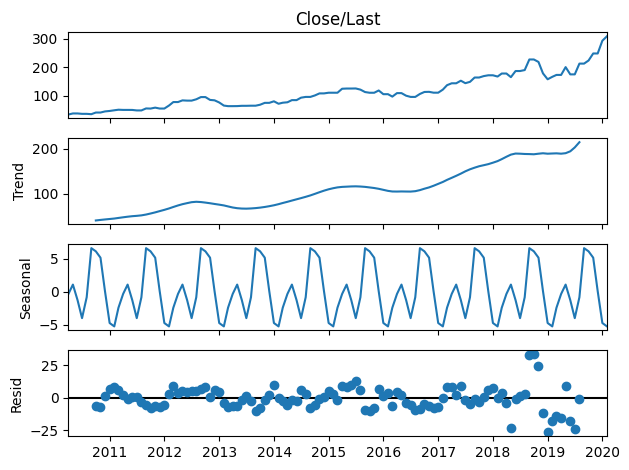

In [22]:


# Set frequency to monthly using 'ME' (Month-End)
df = df.asfreq('ME')  # Set frequency to month-end


# Perform seasonal decomposition with a period of 12 for monthly data
decomposition = seasonal_decompose(df['Close/Last'], model='additive', period=12)

# Plot the decomposition
fig = decomposition.plot()
plt.tight_layout()  # Adjust plot to fit everything neatly
plt.show()

## Visualizing Data at Every Step

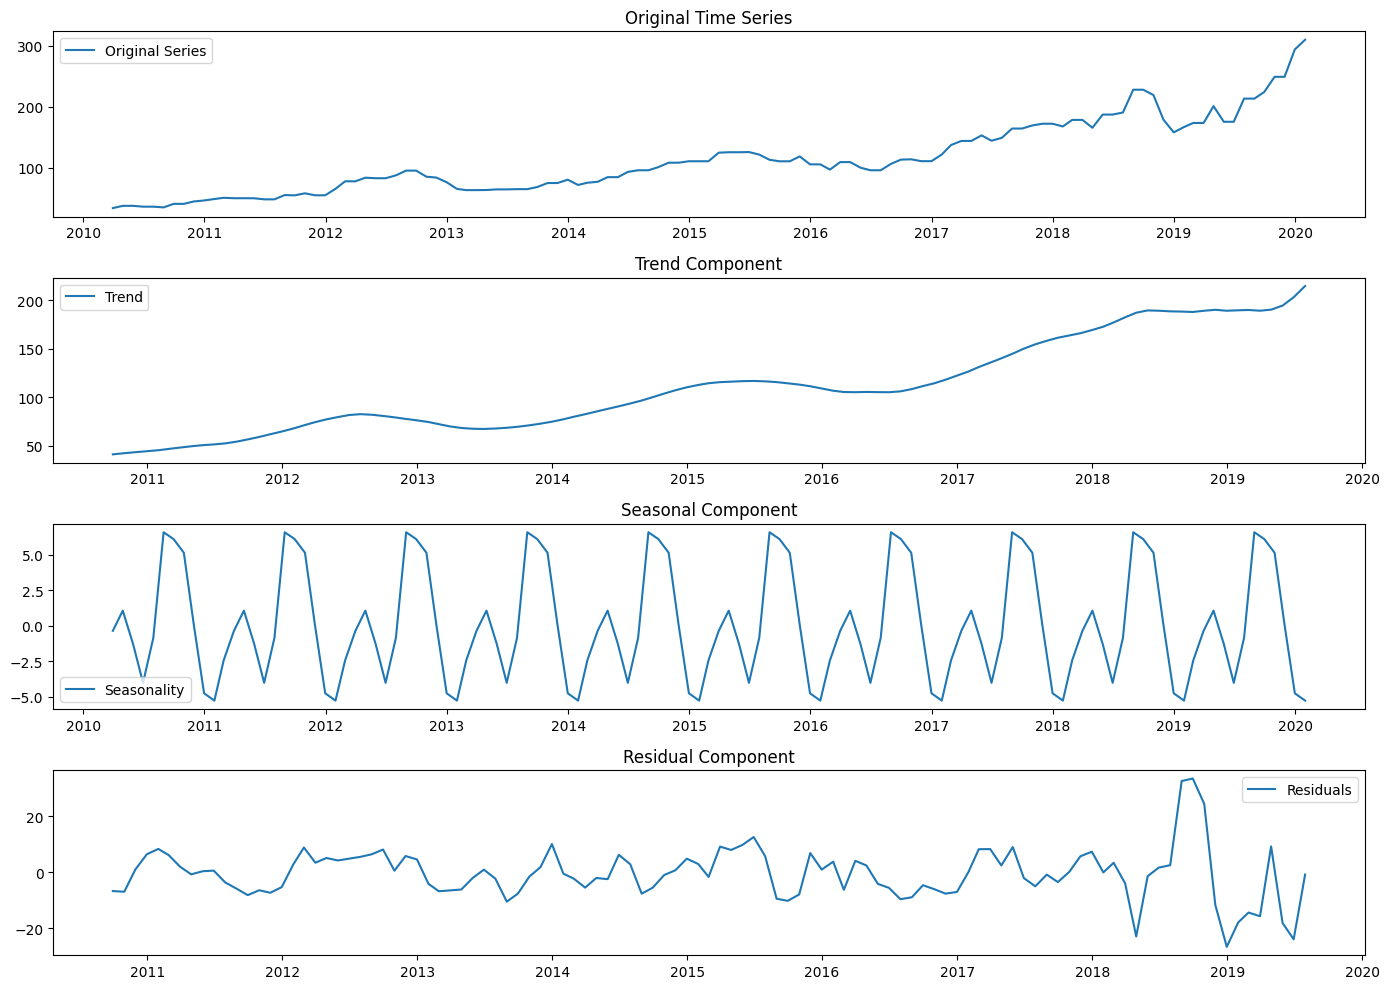

In [23]:
# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the time series data and components
plt.figure(figsize=(14, 10))

# Plot the original time series
plt.subplot(4, 1, 1)
plt.plot(df['Close/Last'], label='Original Series')
plt.title('Original Time Series')
plt.legend(loc='best')

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.title('Trend Component')
plt.legend(loc='best')

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.title('Seasonal Component')
plt.legend(loc='best')

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.title('Residual Component')
plt.legend(loc='best')

plt.tight_layout()  # Adjust plot layout to fit everything neatly
plt.show()

## Performing Seasonal Adjustment
### Overview: Seasonal adjustment removes the seasonal component from a time series to reveal underlying trends and cycles.

## Methods:

### X-12-ARIMA: A statistical method for seasonal adjustment.
### $STL (Seasonal-Trend decomposition using LOESS): Decomposes time series into seasonal, trend, and residual components using local regression.

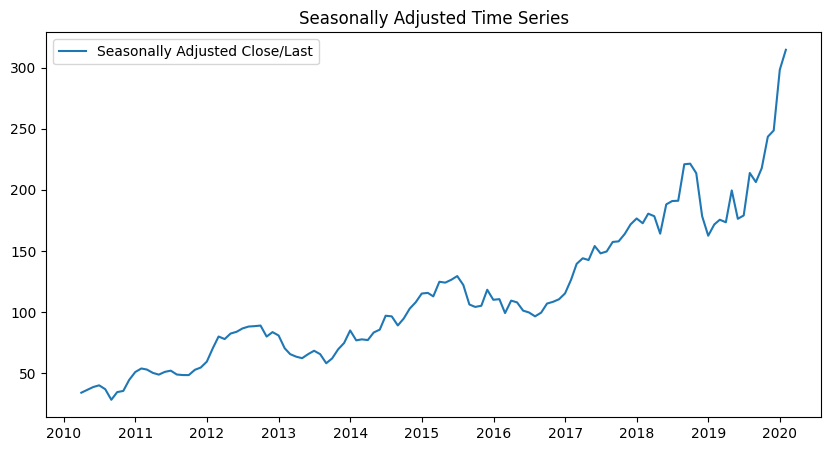

In [24]:
# Perform seasonal decomposition with a period of 12 for monthly data
decomposition = seasonal_decompose(df['Close/Last'], model='additive', period=12)

# Compute the seasonally adjusted series
seasonally_adjusted = df['Close/Last'] - decomposition.seasonal

# Plot the seasonally adjusted series
plt.figure(figsize=(10, 5))
plt.plot(seasonally_adjusted, label='Seasonally Adjusted Close/Last')
plt.title('Seasonally Adjusted Time Series')
plt.legend(loc='best')
plt.show()

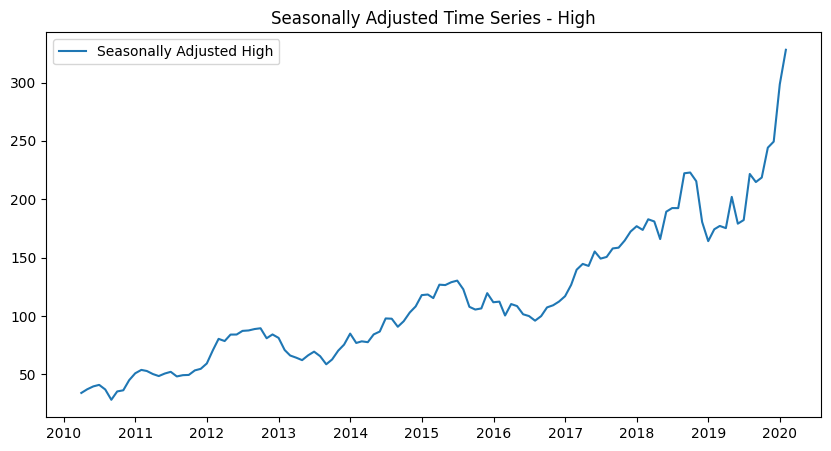

In [25]:
# Perform seasonal decomposition with a period of 12 for monthly data
decomposition = seasonal_decompose(df['High'], model='additive', period=12)

# Compute the seasonally adjusted series
seasonally_adjusted = df['High'] - decomposition.seasonal

# Plot the seasonally adjusted series
plt.figure(figsize=(10, 5))
plt.plot(seasonally_adjusted, label='Seasonally Adjusted High')
plt.title('Seasonally Adjusted Time Series - High')
plt.legend(loc='best')
plt.show()

# Using Appropriate Forecasting Models
### Overview: Choose forecasting models based on the data characteristics and analysis goals. Common models include:

### ARIMA (AutoRegressive Integrated Moving Average): For capturing trends and seasonality.
### Exponential Smoothing: For smoothing data and handling trends and seasonality.
### Prophet: For handling holidays and special events in time series forecasting.

C:\Users\HP\AppData\Local\Temp\ipykernel_20916\3701448488.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')


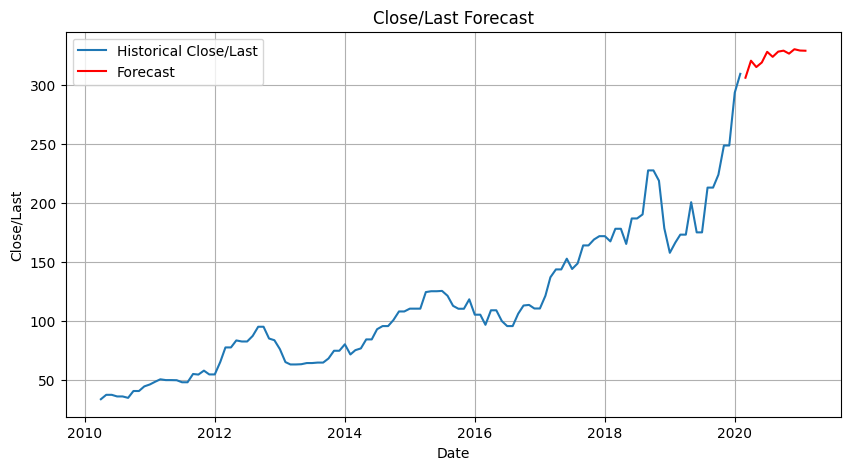

In [27]:
# Fit ARIMA model on the 'Close/Last' column
model = ARIMA(df['Close/Last'], order=(5, 1, 0))  # You can adjust (p, d, q) as needed
model_fit = model.fit()

# Forecast future values
forecast_steps = 12  # Forecasting the next 12 months
forecast = model_fit.forecast(steps=forecast_steps)

# Prepare the index for the forecast
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# Plot historical data and forecast
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close/Last'], label='Historical Close/Last')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Close/Last Forecast')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Close/Last')
plt.grid(True)
plt.show()

# Validating Your Models
### Overview: Model validation ensures that the forecasting model performs well and provides reliable predictions.

## Methods:

### Cross-Validation: Split the data into training and test sets to evaluate model performance.
### Error Metrics: Use metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE) to assess model accuracy.

In [29]:
# Assuming df is your DataFrame with a DateTime index and 'Close/Last' column
# df = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)

# Split data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df['Close/Last'][:train_size], df['Close/Last'][train_size:]

# Fit ARIMA model on training data and make predictions
model = ARIMA(train, order=(5, 1, 0))  # You can adjust (p, d, q) as needed
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Calculate and print Mean Squared Error
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 2905.37


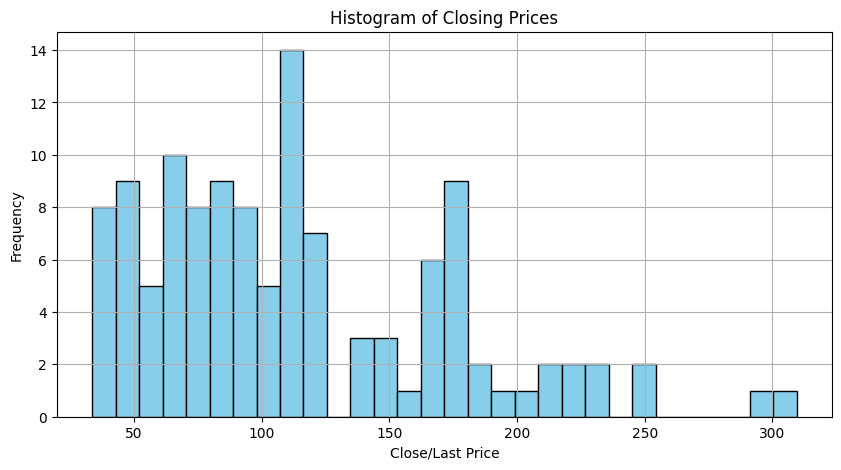

In [30]:
# Plot histogram of the 'Close/Last' prices
plt.figure(figsize=(10, 5))
plt.hist(df['Close/Last'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Closing Prices')
plt.xlabel('Close/Last Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

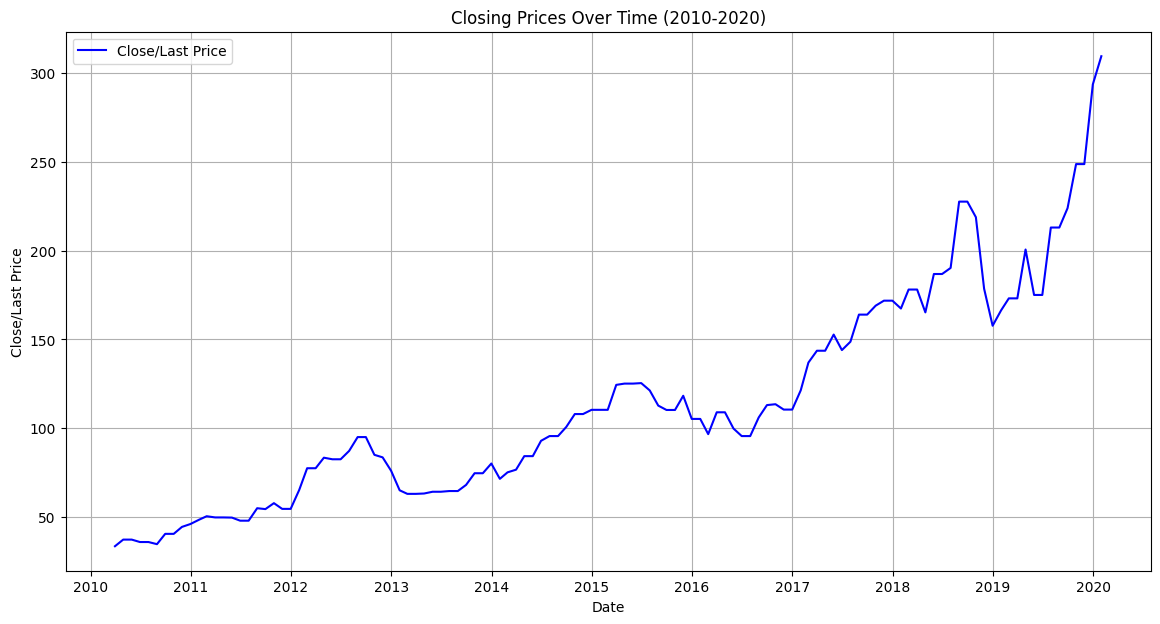

In [33]:
# Plot closing prices over time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close/Last'], label='Close/Last Price', color='blue')
plt.title('Closing Prices Over Time (2010-2020)')
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

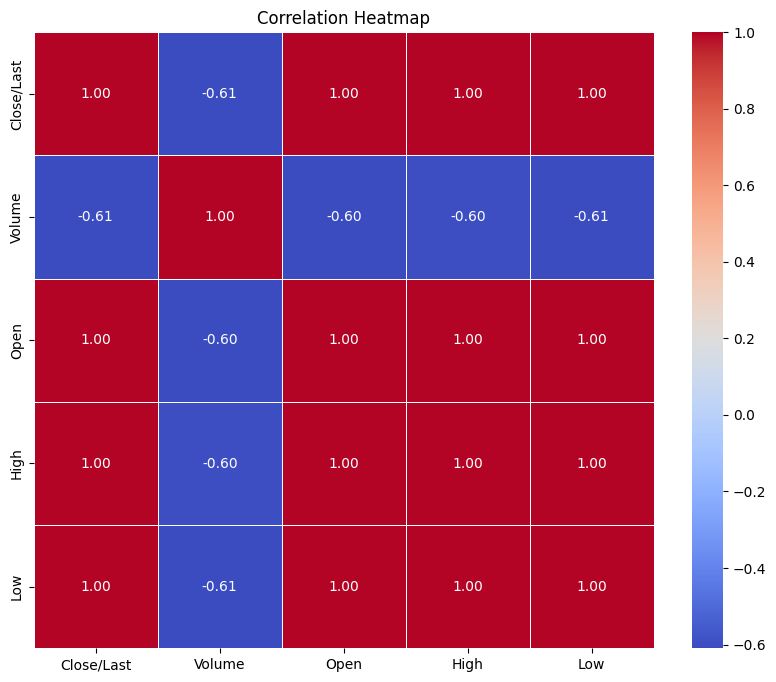

In [36]:
import seaborn as sns

# Create a DataFrame with multiple features
df_features = df[['Close/Last', 'Volume', 'Open', 'High', 'Low']]

# Compute the correlation matrix
correlation_matrix = df_features.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

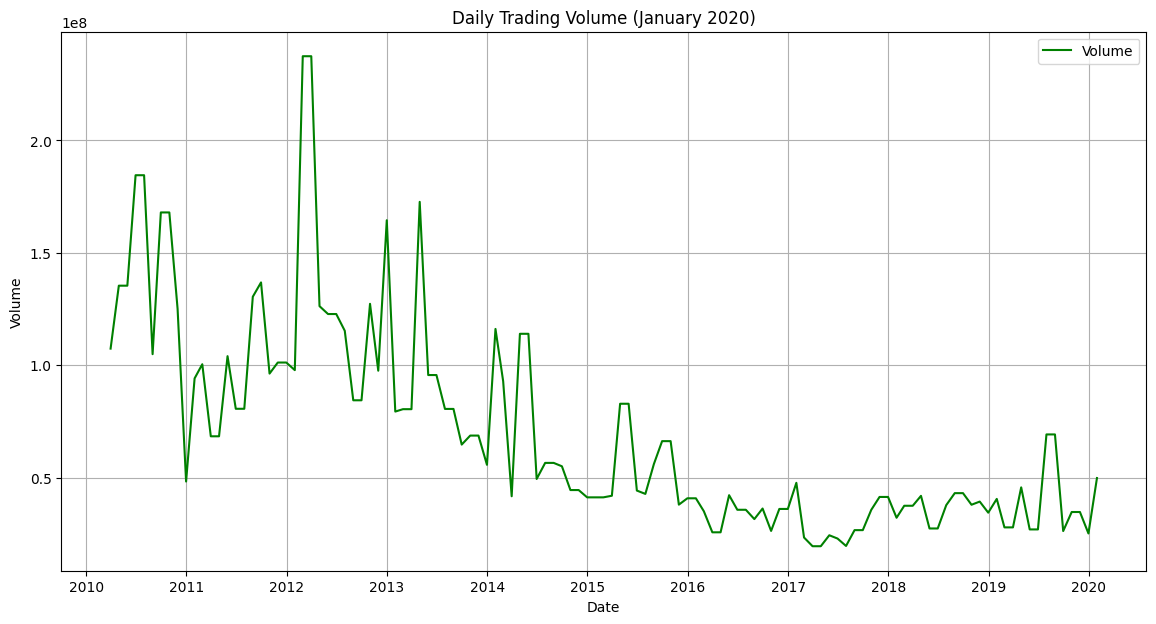

In [37]:
# Plot volume of trades over time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Volume'], label='Volume', color='green')
plt.title('Daily Trading Volume (January 2020)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='best')
plt.grid(True)
plt.show()
